In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("Health_insurance_cost.xlsx")

In [3]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


Question 1: Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?

Health care costs are rising nowadays hence prediction of health insurance costs could help many people. It can help an individual to choose the right and affordable insurance plan.
Doctors can also plan treatment effectively and affordabily for patients.
predicting health insurances can help companies plan further strategies and plans.



Question 2: If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?

There could be knowledge gaps due to various reasons like some sensitive datais restricted due to privacy. Also, there may be some missing values present that alters the accuracy of the models.

In medical domain, accuracy is of the highest important compared to others. Thus, health insurance trained models may not be used in other type of insurance since the risk factor and data is significantly different.

Question 3: Aim to identify patterns in the data and important features that may impact an ML model.


In [4]:
df.dtypes

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [7]:
df = df.dropna(subset=['age'])
df = df.dropna(subset=['BMI'])
df = df.dropna(subset=['health_insurance_price'])

In [8]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [9]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1285.000000,1285.000000,1285.000000,1285.000000
mean,39.158755,30.618280,1.086381,13176.620958
std,14.100762,6.102982,1.206618,12061.230442
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.180000,0.000000,4719.524050
50%,39.000000,30.300000,1.000000,9304.701900
75%,51.000000,34.500000,2.000000,16450.894700
max,64.000000,53.130000,5.000000,63770.428010


### Data visualization

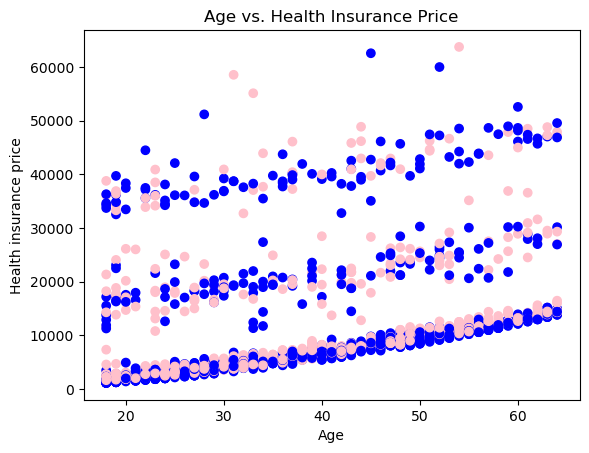

In [10]:
colors = {'male': 'blue', 'female': 'pink'}
plt.scatter(x=df['age'], y=df['health_insurance_price'],c=df['gender'].map(colors))
plt.xlabel('Age')
plt.ylabel('Health insurance price')
plt.title('Age vs. Health Insurance Price')
plt.show()

Question 3: Aim to identify patterns in the data and important features that may impact an ML model.

After analyzing the scatter plot for age vs health insurance prices value we can infer that majority of the concentration lies in the 0 to 15000 price range for all the age groups and it gradually reduces as the prices increases.

Also we can conclude that as the age group value increases from 0 to 70 the average health insurance prices are also increasing.

In [11]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160


In [12]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [13]:
print(df['gender'].unique())
print(df['Children'].unique())
print(df['smoking_status'].unique())
print(df['location'].unique())

['male' 'female']
[1 3 0 2 5 4]
['no' 'yes']
['southeast' 'northwest' 'northeast' 'southwest']


<Axes: xlabel='location', ylabel='health_insurance_price'>

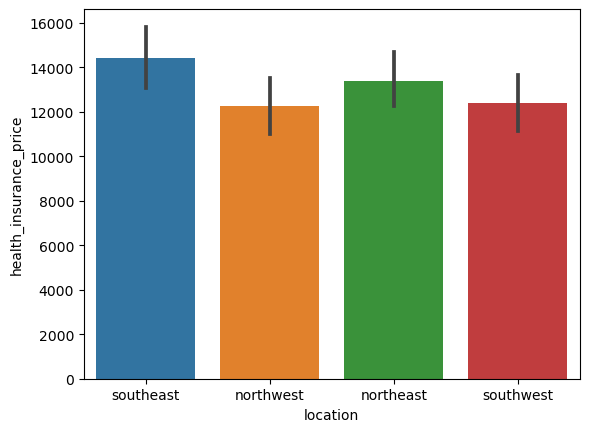

In [14]:
sns.barplot(data = df, y = df['health_insurance_price'], x = df['location'])

<Axes: xlabel='gender', ylabel='health_insurance_price'>

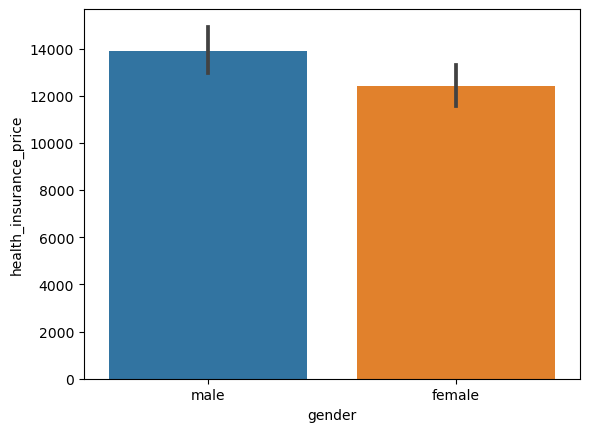

In [15]:
sns.barplot(data = df, y = df['health_insurance_price'], x = df['gender'])

<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

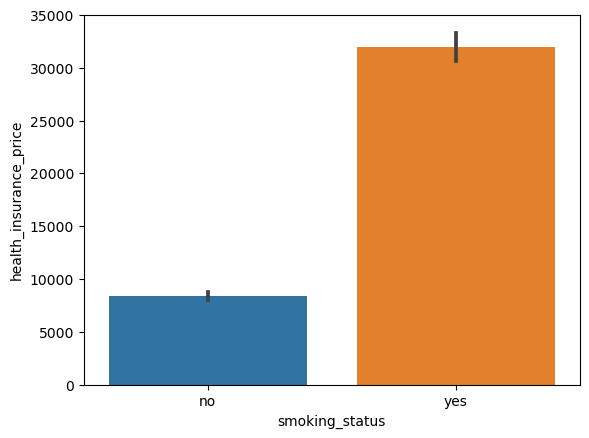

In [16]:
sns.barplot(data = df, y = df['health_insurance_price'], x = df['smoking_status'])

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

In [19]:
# Here we are using Label encoder to convert the categorical data into numerical data
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['location'] = encoder.fit_transform(df['location'])

In [20]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
5,31.0,0,25.740,0,0,2,3756.62160


In [21]:
X = df[['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location']]
Y = df[['health_insurance_price']]

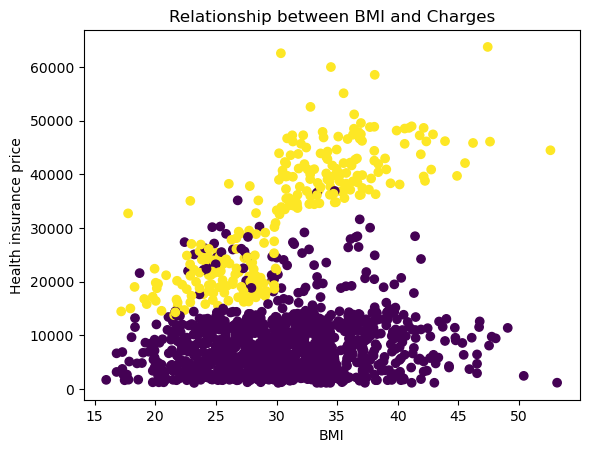

In [22]:
colors = {'male': 'blue', 'female': 'pink'}
plt.scatter(x=df['BMI'], y=df['health_insurance_price'],c=df['smoking_status'])
plt.xlabel('BMI')
plt.ylabel('Health insurance price')
plt.title('Relationship between BMI and Charges')
plt.show()

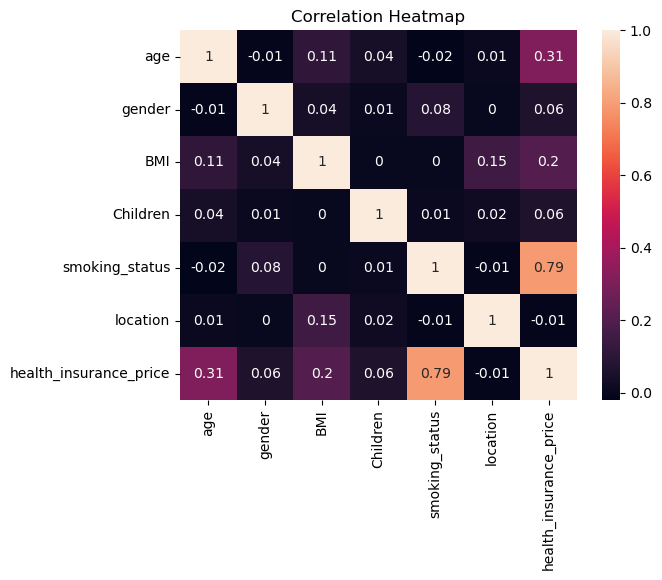

In [23]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot = True)
plt.title("Correlation Heatmap")
plt.show()

From the heatmaps for correlation between the variables we can clearly infer that the value of health insurance price is majorly dependent on whether the person is smoker or not and from the above scatterplot as well we can predict that on average person who smokes as a higher value of health insurance than a non-smoking person.
We can also see that health insurance price is also dependent on the age of the person. Health insurance price is direct proportional to age

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)
print(" X Train",x_train.shape)
print(" X Test",x_test.shape)
print(" Y Train",y_train.shape)
print(" Y Test",y_test.shape)

 X Train (1028, 6)
 X Test (257, 6)
 Y Train (1028, 1)
 Y Test (257, 1)


## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(x_train, y_train)

LinearRegression()

In [28]:
model.score(x_train, y_train)

0.7630108012209055

In [29]:
pred = model.predict(x_test)
res = x_test.copy()
res['y_actual'] = y_test
res['y_pred'] = pred
res['error'] = y_test - pred
res.head()

,age,gender,BMI,Children,smoking_status,location,y_actual,y_pred,error
1160,43.0,0,34.580,1,0,1,7727.25320,10631.280002,-2904.026802
1310,42.0,1,26.315,1,0,1,6940.90985,7642.796412,-701.886562
859,57.0,1,28.100,0,0,3,10965.44600,10874.174452,91.271548
1005,29.0,1,31.730,2,0,1,4433.38770,6547.767741,-2114.380041
1193,48.0,0,36.575,0,0,1,8671.19125,12015.229363,-3344.038113


In [30]:
from sklearn.metrics import r2_score
print(r2_score(res["y_actual"],res["y_pred"]))

0.7140719438187139


## K folds Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
num_folds = 5
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=num_folds)

In [33]:
print(f"Cross-validation scores: {cross_val_scores}")

Cross-validation scores: [0.7690979  0.71969997 0.77853181 0.73343468 0.75130593]


## Random Forest


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16552\3748100441.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)


RandomForestRegressor()

In [36]:
rf_model.score(x_train, y_train)

0.9770206403242718

In [37]:
y_pred = rf_model.predict(x_test)
print(r2_score(y_test,y_pred))

0.8310461682514966


## XGBoost Model

In [38]:
from xgboost import XGBRegressor

In [39]:
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
xg_model.score(x_train, y_train)

0.994226390174264

In [41]:
y_pred = xg_model.predict(x_test)
print(r2_score(y_test,y_pred))

0.8120292781442429


The XGBoost model gave the highest training accuracy of 99.58%followed by Random forest model with an accuracy of  97.75% and then the Linear regression with 76.54%.
But the R2 score of the Random Forest was slight better than that of the XGBoost.

In [42]:
X = np.array([[33, 'male', 22.705, 0, 'no','northwest']])
X

array([['33', 'male', '22.705', '0', 'no', 'northwest']], dtype='<U32')

In [43]:
X[:,1] = encoder.fit_transform(X[:,1])
X[:,4] = encoder.fit_transform(X[:,4])
X[:,5] = encoder.fit_transform(X[:,5])
X = X.astype(float)
X

array([[33.   ,  0.   , 22.705,  0.   ,  0.   ,  0.   ]])

In [44]:
X.dtype

dtype('float64')

In [45]:
y_pred1 = model.predict(X)
y_pred1

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4374.97179779]])

In [46]:
y_pred2 = rf_model.predict(X)
y_pred2

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11618.0624486])

In [47]:
y_pred3 = xg_model.predict(X)
y_pred3

array([12829.046], dtype=float32)

In [48]:
import pickle

In [49]:
data = {"model": xg_model, "le_encoder": encoder}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [50]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
model_loaded = data["model"]
encoder_loaded = data["le_encoder"]

In [51]:
y_pred4 = model_loaded.predict(X)
y_pred4

array([12829.046], dtype=float32)

In [56]:
df1 = pd.read_excel("Health_insurance_cost.xlsx")
df1

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [58]:
df1.location.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64